In [76]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment1.ipynb")

# Assignment 1: 2018 US House Elections
**PSTAT 134/234 (Winter 2023)  
Due Date: Monday, January 30, 11:59 PM**

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*
- NA

## Direction and Goal

![election_prediction](include/clinton-trump-rating.png)  
[image credit](https://donsnotes.com/politics/images/clinton-trump-rating.png)

We haven't talked about predictive models, but we can still think about what makes a "good" prediction.  In this assignment, we'll focus on evaluating the quality of election predictions made by the website [fivethirtyeight.com](https://www.fivethirtyeight.com).  As one prominent example, fivethirtyeight predicted that Clinton had a 70.9% chance to win the election.  Was their model wrong?

To gain insight into questions like this, we'll focus on  [US House elections predictions from 2018](https://projects.fivethirtyeight.com/2018-midterm-election-forecast/house/).  Their predictions are based predominantly on polling data but include other sources as well (state of the economy, overall favoriability of politic parties, etc).  

This homework is based loosely on [this article](https://projects.fivethirtyeight.com/checking-our-work/).  Please read the article before beginning the assignment.

## Question 1: Data Processing

### Download Data
Command line interface is a useful tool for programmatically interacting with general functions of your computer: e.g. manipulate/manage files, download from the internet, run scripts, etc.

We will get acquainted with command line soon, but below uses command line interace commands to download the raw CSV file from [fivethirtyeight's github page for this data](https://github.com/fivethirtyeight/checking-our-work-data/blob/master/us_house_elections.csv). The `!` mark tells Jupyter notebook that the command following it is to be evaluated as a command line code.

In [77]:
!wget -nc https://raw.githubusercontent.com/fivethirtyeight/checking-our-work-data/master/us_house_elections.csv  -O include/us_house_elections.csv

File ‘include/us_house_elections.csv’ already there; not retrieving.


In [78]:
!ls -lF include/ ## `ls` command verify that data is downloaded in our folder

total 28212
-rw-r--r-- 1 rongfei rongfei    51225 Jan 29 17:02 clinton-trump-rating.png
-rw-r--r-- 1 rongfei rongfei 28834571 Jan 29 17:02 us_house_elections.csv


### Read Data into Python

Numpy and Pandas is used to read in the csv file into python.

In [79]:
import pandas as pd
import numpy as np
election_data = pd.read_csv("include/us_house_elections.csv", low_memory=False)

Add column of zeros named `bin` to `election_data` (we will populate this column with meaningful data later) and `print` the first 10 rows of the `DataFrame` using `iloc`.

In [80]:
election_data["forecast_date"].max()

'2020-11-03'

In [81]:
election_data["bin"] = 0
print(election_data.iloc[:10,:])

   year office state  district election_date forecast_date forecast_type  \
0  2020  House    WY       1.0    2020-11-03    2020-11-03          lite   
1  2020  House    WY       1.0    2020-11-03    2020-11-03          lite   
2  2020  House    WV       3.0    2020-11-03    2020-11-03          lite   
3  2020  House    WV       3.0    2020-11-03    2020-11-03          lite   
4  2020  House    WV       2.0    2020-11-03    2020-11-03          lite   
5  2020  House    WV       2.0    2020-11-03    2020-11-03          lite   
6  2020  House    WV       1.0    2020-11-03    2020-11-03          lite   
7  2020  House    WV       1.0    2020-11-03    2020-11-03          lite   
8  2020  House    WI       8.0    2020-11-03    2020-11-03          lite   
9  2020  House    WI       8.0    2020-11-03    2020-11-03          lite   

  party  candidate  projected_voteshare  actual_voteshare   probwin  \
0     D       Bull             34.73896         24.576584  0.003150   
1     R     Cheney   

Fivethirtyeight has three different prediction models: `lite`, `classic` and `deluxe`, which roughly incorporate an increasing number of assumptions.  In this assignment lets focus on evaluting the quality of the `classic` predictions.  You can read more about how the prediction models work [here](https://fivethirtyeight.com/methodology/how-fivethirtyeights-house-and-senate-models-work/).

Fivethirtyeight continuously updated their predictions as more polling data became available for each of the races.  Let's focus on the predictions a few months before the election, on August 11th, and on the morning of election day, November 6th.  

### Question 1a: Subset Data

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 5
-->

Create a new pandas dataframe called `election_sub` by filtering to include only rows in which the `forecast_type` is "classic", and the date of the foreceast (`forecast_date`) is 8/11 or 11/6. 

Using `query` method seems well-suited.  Note you can make two (or more) calls to `query` by chaining calls to `query` like this: `election_data.query(...).query(...)`. Output of one query will be used as an input to the second query.

In [82]:
# Fill-in ...
election_sub = election_data.query("forecast_type == 'classic'").query("forecast_date == '2018-08-11' | forecast_date == '2018-11-06' ")

In [83]:
grader.check("q1a")

q1a passed!

### Question 1b: Filtering Data

In previous question, data was subset for two forcast dates: 2018-11-06 and 2018-08-11. Presumably, there _should be_ two rows (predictions) for each candidate; however, you will see that some candidates are missing one of the two predictions and not all name entries are valid.

Using Pandas, remove any NaN names and any candidate that does not have two predictions.

Finally, overwrite `election_sub` with the filtered data.

There are different ways of doing this. I found the following functions useful:

* [`pandas.DataFrame.isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html)
* [`pandas.DataFrame.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
* [`pandas.core.groupby.DataFrameGroupBy.filter`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html)
* [`pandas.DataFrame.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html)

When using the documentation, make sure to use the correct version. You can check by running `pd.__version__`.

<!--
BEGIN QUESTION
name: q1b
manual: false
points: 3
-->

In [84]:
# Fill-in ... and ###some task###
election_sub = election_sub[~election_sub["candidate"].isnull()].groupby("candidate").filter(lambda x: len(x) == 2)

In [85]:
grader.check("q1b")

q1b passed!

### Question 1c: Transform Data

<!--
BEGIN QUESTION
name: q1c
manual: false
points: 3
-->

We want to check whether events predicted by 538 to occur with probability _close to_ X% actually occured about X% of the time.  To do this, we have to define _close_.

First, we'll define the `cut_points` as 20 equally spaced numbers between 0 and 1 using `np.linspace`.  Then we'll group the predicted probabilities into the `19` equally spaced bins determined by those cut points.  Define the bin for each observation using the `pd.cut` function on the `probwin` variable.  Then, assign the result to column `bin` of `election_sub`. Use `include_lowest=True` when calling `pd.cut`.

_Note: Can you spot the strange behavior of `include_lowest=True`? [Despite the output, `pd.cut` seems to work correctly](https://github.com/pandas-dev/pandas/issues/23164#issuecomment-510700455)_

In [86]:
cut_points = np.linspace(0, 1, 20)
election_sub["bin"] = pd.cut(election_sub["probwin"], cut_points, include_lowest=True)


In [87]:
grader.check("q1c")

q1c passed!

## Question 2: Looking for Insights

### Question 2a: Calculate Change in Support

Let's see if we can find the candidates whose standings change the most between August 11 and November 6: one with largest improvement and another with largest decrease in win-probability. First, use the `agg` function calculate the difference.

Following functions have been useful for me:

* [`numpy.diff`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html)
* [`pandas.DataFrame.sort_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
* [`pandas.DataFrame.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
* [`pandas.DataFrame.agg`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html): especially, [different functions to columns](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#applying-different-functions-to-dataframe-columns) 

Save the resulting DataFrame from `agg()` to a variable, `probwin_change`. 

<!--
BEGIN QUESTION
name: q2a
manual: false
points: 5
-->

In [88]:
#election_sub.sort_values(by=["forecast_date"]).groupby([ "candidate"]).get_group("Aaron Andrus")
probwin_change = election_sub.sort_values(by=["forecast_date"]).groupby(["candidate"]).agg({"probwin" : lambda x: np.diff(x)[0]})
probwin_change.head()

,probwin
candidate,
A. Donald McEachin,0.00040
Aaron Andrus,0.00010
Aaron Swisher,-0.00228
Abby Finkenauer,0.08214
Abigail Spanberger,0.11884


In [89]:
grader.check("q2a")

q2a passed!

### Question 2b: Looking for Largest Changes

Now, save the name of the candidates to string variables `rising_candidate` (largest increase) and `falling_candidate` (largest decrease).

* [`pandas.DataFrmae.idxmax`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html)
* [`pandas.DataFrmae.idxmin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

<!--
BEGIN QUESTION
name: q2b
manual: false
points: 3
-->

In [90]:
rising_candidate = probwin_change.idxmax()[0]
falling_candidate = probwin_change.idxmin()[0]
rising_candidate, falling_candidate

('Sharice Davids', 'Kevin Yoder')

In [91]:
grader.check("q2b")

q2b passed!

<!-- BEGIN QUESTION -->

### Question 2c: Verify Outcome

Did the candidate win or lose the election? Verify with election outcome.
<!--
BEGIN QUESTION
name: q2c
manual: true
points: 5
-->

Sharice Davids won
Kevin Yoder lost

<!-- END QUESTION -->



## Prediction vs Actual Outcomes

<!-- BEGIN QUESTION -->

### Question 3a: Prediction Histogram

Make a histogram showing the predicted win probabilities _on the morning of the election._  Again, restrict yourself to only the `classic` predictions.

<!--
BEGIN QUESTION
name: q3a
manual: true
points: 5
-->

Text(0.5, 1.0, 'Histogram of probwin for classic forecasts')

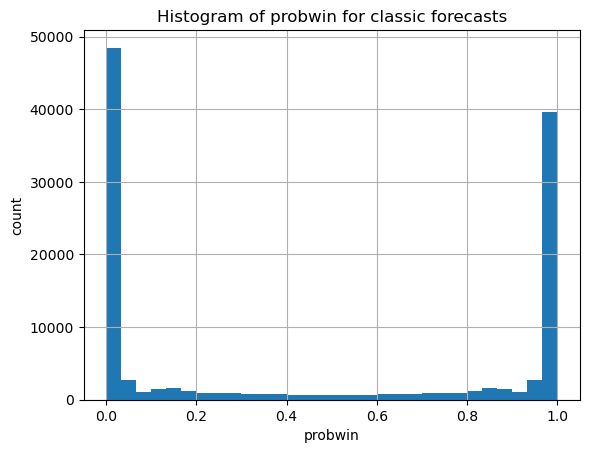

In [92]:
ax = election_data.query("forecast_type=='classic'")["probwin"].hist(bins=30)
ax.set_xlabel("probwin")
ax.set_ylabel("count")
ax.set_title("Histogram of probwin for classic forecasts")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3b: Prediction difficulty 

Are most house elections easy to forecast or hard to forecast? State your reasoning.

<!--
BEGIN QUESTION
name: q3b
manual: true
points: 5
-->

Easy, because the chance of predicition has high frequency in both high chances of winning and low chances of winning, so one can be more definite on the outcome of the election rather than guessing the head of a coin (if the prediciting probability is about 50%)

<!-- END QUESTION -->

### Question 4a: Compute Actual Outcomes

Now we've grouped the observations into a discrete set of bins according to the predicted probability, `probwin`.  Within each bin, we now want to compute the actual fraction of times the candidates won.

If 538 did a good job, it will be close to the predited probabilities.  You'll need to use the `groupby` function to compute the mean of `probwin_outcome` (1 is a win and 0 is a loss) within each bin. Once again you can use `agg` method here.  

Save the fraction of actual wins in each bin in a list called `fraction_outcome`.

<!--
BEGIN QUESTION
name: q4a
manual: false
points: 5
-->

In [93]:
fraction_outcome = election_sub.groupby("bin").agg({"probwin_outcome" : "mean"})
print(fraction_outcome)

                  probwin_outcome
bin                              
(-0.001, 0.0526]         0.001186
(0.0526, 0.105]          0.062500
(0.105, 0.158]           0.023810
(0.158, 0.211]           0.142857
(0.211, 0.263]           0.200000
(0.263, 0.316]           0.058824
(0.316, 0.368]           0.235294
(0.368, 0.421]           0.272727
(0.421, 0.474]           0.466667
(0.474, 0.526]           0.500000
(0.526, 0.579]           0.533333
(0.579, 0.632]           0.727273
(0.632, 0.684]           0.764706
(0.684, 0.737]           0.941176
(0.737, 0.789]           0.800000
(0.789, 0.842]           0.857143
(0.842, 0.895]           0.976190
(0.895, 0.947]           0.937500
(0.947, 1.0]             0.998473


In [94]:
grader.check("q4a")

q4a passed!

### Question 4b: Preparing to Present Results

<!--
BEGIN QUESTION
name: q4b
manual: false
points: 5
-->

For this problem we'll make a plot of the predicted probabilities and actual fraction of wins in each bin.  We've already computed the actual fraction of wins; all that remains is to plot it against the predicted value assocaited with each bin.

For the predicted value in each bin, using the midpoint of the bin would make sense.  Compute the midpoints of each bin from `cut_points`.

In [95]:
midpoints = cut_points[:-1] + np.diff(cut_points)/2

In [96]:
grader.check("q4b")

q4b passed!

<!-- BEGIN QUESTION -->

### Question 4c: Visualize Results

<!--
BEGIN QUESTION
name: q4c
manual: true 
points: 5
-->

Now make a scatterplot using `midpoints` as the x variable and `fraction_outcome` as the y variable.  Draw a dashed line from `[0,0]` to `[1,1]` to mark the line y=x.  

Text(0, 0.5, 'fractional probwin')

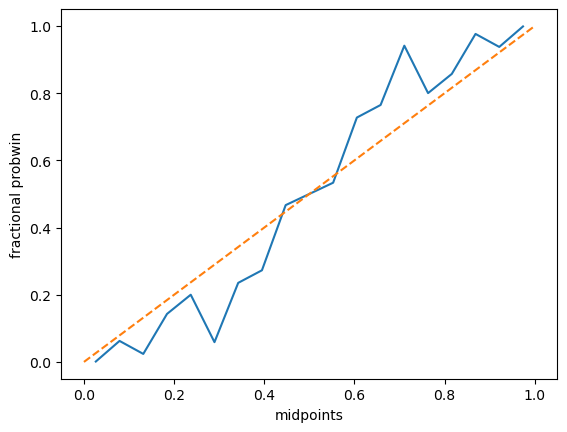

In [97]:
# magic for showing figures inline
%matplotlib inline 
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(midpoints, fraction_outcome)
ax.plot([0,1], [0,1], linestyle='--')
ax.set_xlabel("midpoints")
ax.set_ylabel("fractional probwin")




<!-- END QUESTION -->



## Quantifying Uncertainty

### Question 5a: Model-based Error Estimation

If you did things correctly, it should look like fivethirtyeight has done "pretty" well with their forecasts: the actual fraction of wins tracks closely with the predicted number.

But how do we decide what's "good enough"? Consider this example: I correctly predict that a coin is fair (e.g. that it has a 50% chance of heads, 50% chance of tails).  But if I flip it 100 times, I can be pretty sure it won't come up heads exactly 50 times.  The fact that heads didn't come up exactly 50 times doesn't make my prediction incorrect.

To assess how reasonable the predictions are, I need to quantify the uncertainty in my estimate.  It's reasonable to assume that within each bin, $k$, the observed number of wins, $Y_k \sim \text{Binomial}\,(n_k, p_k)$, where $n_k$ is the number of elections and $p_k$ is the predicted win probability in bin $k$.

Classical results tell us that the obseved fraction of wins in bin $k$, $\hat p = \frac{Y_k}{n_k}$ has variance $\operatorname{Var}\left(\hat p_k\right) = \frac{p_k (1-p_k)}{n_k} \approx \frac{\hat p_k(1- \hat p_k)}{n_k}$.  The standard deviation of the Binomial proportion then is $\hat \sigma_k \approx \sqrt{\frac{\hat p_k(1- \hat p_k)}{n_k}}$.  

If we use the [normal approximation to generate a confidence interval](https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Normal_approximation_interval), then the 95% interval has the form $\hat p_k \pm 1.96 \hat \sigma_k$.

Create a new "aggregated" dataframe named `election_agg`.  Take `election_sub`, group by `bin` and compute both the average of the `probwin_outcome` (`mean`) and the number of observations in each bin (`count`) using the `agg` function.  Call this new data frame, `election_agg`.

THen, use the `mean` and `count` columns of `election_agg` to create a new column of `election_agg` titled `err`, which stores $1.96 \times \hat \sigma_k$ in each bin $k$.

<!--
BEGIN QUESTION
name: q5a
manual: false
points: 3
-->

In [98]:
# Get mean and size of each bin
election_agg = election_sub.groupby("bin").agg(mean=("probwin_outcome", "mean"), count=("probwin_outcome","count"))
election_agg['err'] = 1.96 * np.sqrt(election_agg["mean"] * (1 - election_agg["mean"]) / election_agg["count"])
election_agg

,mean,count,err
bin,,,
"(-0.001, 0.0526]",0.001186,843,0.002324
"(0.0526, 0.105]",0.062500,32,0.083870
"(0.105, 0.158]",0.023810,42,0.046108
"(0.158, 0.211]",0.142857,28,0.129615
"(0.211, 0.263]",0.200000,30,0.143138
"(0.263, 0.316]",0.058824,17,0.111852
"(0.316, 0.368]",0.235294,17,0.201644
"(0.368, 0.421]",0.272727,22,0.186105
"(0.421, 0.474]",0.466667,15,0.252472


In [99]:
grader.check("q5a")

q5a passed!

<!-- BEGIN QUESTION -->

### Question 5b: Visualize Error Bars 1

Use `plt.errorbar` to create a new plot with error bars associated with the actual fraction of wins in each bin.  Again add a dashed y=x line.  Set the argument `fmt='.'` to create a scatterplot with errorbars.

<!--
BEGIN QUESTION
name: q5b
manual: true
points: 5
-->

<Figure size 1000x1000 with 0 Axes>

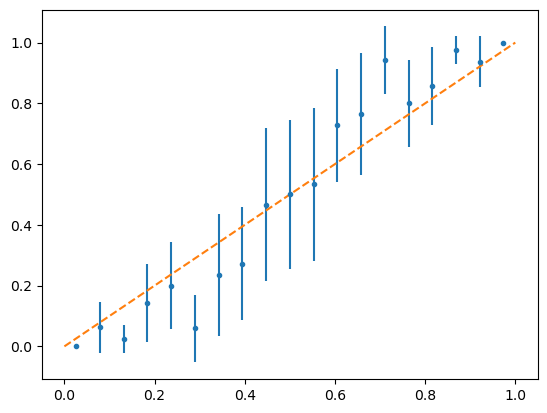

In [126]:
# Plotting code below
# create errror bars

plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
ax.errorbar(midpoints, election_agg["mean"], yerr=election_agg["err"], fmt='.')
ax.plot([0,1], [0,1], linestyle='--')


<!-- END QUESTION -->

### Question 5c: Computing Coverage

If our intervals were true 95% confidence intervals, then we would expect about 95% of them to cover the midpoint of the bin (i.e. overlap with the y=x line).

What fraction of the 95% confidence intervals cover the bin midpoint?  Create a variable, `upper`, to be the `mean` + `err` and another, `lower`, to be `mean` - `err` (both `upper` and `lower` should pandas series). Next, compute `frac_covering` as the fraction of midpoints between `lower` and `upper`. 

<!--
BEGIN QUESTION
name: q5c
manual: false
points: 5
-->

In [101]:
upper = election_agg["mean"] + election_agg["err"]
lower = election_agg["mean"] - election_agg["err"]

frac_covering = np.mean((lower <= midpoints) & (midpoints <= upper))
frac_covering

0.6842105263157895

In [102]:
grader.check("q5c")

q5c passed!

<!-- BEGIN QUESTION -->

### Question 5d: Understanding Confidence Intervals

Are the 95% confidence intervals generally larger or smaller for more confident predictions (e.g. the predictions closer to 0 or 1).  What are the factors that determine the length of the confidence intervals?

<!--
BEGIN QUESTION
name: q5d
manual: true
points: 5
-->

Confidence interval should be smaller for more confident predictions since the error should be smaller.
Based on the formular for confidence interval, there are several factors
- alpha, smaller alpha gives smaller CI
- standard deviation, smaller sd gives smaller CI
- number of samples, higher n gives smaller CI


<!-- END QUESTION -->



_Intentionally Blank_

### (PSTAT 234) Question 5e: Empirical Uncertainty Estimation

Model-based error bars were calculated by assuming that election outcomes are Binomial random variables. However, we can also estimate the error bars from resampling the data. This can be useful if we do not have a good distributional about the election outcomes, for example.

Write a function named `bootstrap_data_means` that can take a data frame, say `data_in`, as input. Suppose `data_in` has `n` rows. Inside `bootstrap_data_means` function, you will

* [`numpy.random.Generator.choice`](https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.choice.html?highlight=random%20choice#numpy.random.Generator.choice): Select `n`-rows of `data_in` at random _with replacement_, creating a pseudo-dataset
* `agg`: Group by each `bin`, compute probabilities of success for each pseudo-dataset as you have done


Then, run the function `bootstrap_data_means` function 100 times, storing the resulting 100 DataFrames in a list. Then, create a data frame `bootstrap_election_100_agg` using `pandas.concat`:

* Python list comprehension: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
* [`pandas.concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html): Concatenate many DataFrames together.  
    Especially, the example, _Combine two DataFrame objects with identical columns._, in https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html could be helpful.

<!--
BEGIN QUESTION
name: q5e
manual: false
points: 5
-->

In [119]:
def bootstrap_data_means(data_in):
    
    from numpy.random import choice
    
    n = len(data_in)
    
    # randomly sample row indices with replacement
    indices = choice(n, size=n, replace=True)
    # compute probabilities of success
    bootstrap_means = data_in.iloc[indices,:].groupby("bin").agg({"probwin_outcome" : "mean"})
    
    return(bootstrap_means)


bootstrap_election_100_agg = pd.concat([bootstrap_data_means(election_sub) for i in range(100)], axis=1)
bootstrap_election_100_agg

,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,...,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome,probwin_outcome
bin,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 0.0526]",0.003468,0.001185,0.001208,0.002265,0.001174,0.000000,0.001136,0.000000,0.001195,0.000000,...,0.001218,0.000000,0.001263,0.002350,0.000000,0.001163,0.002389,0.003580,0.000000,0.000000
"(0.0526, 0.105]",0.100000,0.000000,0.076923,0.000000,0.104167,0.000000,0.000000,0.027027,0.023256,0.085714,...,0.048780,0.129032,0.076923,0.051282,0.030303,0.100000,0.031250,0.027778,0.000000,0.058824
"(0.105, 0.158]",0.000000,0.000000,0.030303,0.023810,0.054054,0.027027,0.027778,0.000000,0.018182,0.021739,...,0.046512,0.000000,0.023810,0.000000,0.022727,0.014493,0.000000,0.047619,0.029412,0.071429
"(0.158, 0.211]",0.090909,0.258065,0.166667,0.192308,0.000000,0.171429,0.137931,0.194444,0.185185,0.142857,...,0.086957,0.121212,0.121212,0.057143,0.111111,0.166667,0.047619,0.107143,0.176471,0.192308
"(0.211, 0.263]",0.269231,0.303030,0.214286,0.172414,0.272727,0.200000,0.121212,0.156250,0.250000,0.133333,...,0.038462,0.156250,0.217391,0.108108,0.107143,0.040000,0.214286,0.193548,0.285714,0.216216
"(0.263, 0.316]",0.047619,0.058824,0.050000,0.111111,0.071429,0.043478,0.166667,0.000000,0.000000,0.000000,...,0.055556,0.047619,0.166667,0.062500,0.000000,0.083333,0.095238,0.000000,0.090909,0.125000
"(0.316, 0.368]",0.181818,0.181818,0.357143,0.117647,0.266667,0.277778,0.153846,0.300000,0.333333,0.384615,...,0.250000,0.300000,0.142857,0.400000,0.222222,0.315789,0.142857,0.200000,0.133333,0.421053
"(0.368, 0.421]",0.185185,0.368421,0.384615,0.142857,0.187500,0.200000,0.343750,0.296296,0.187500,0.260870,...,0.176471,0.185185,0.173913,0.230769,0.333333,0.238095,0.200000,0.190476,0.206897,0.318182
"(0.421, 0.474]",0.333333,0.583333,0.363636,0.600000,0.363636,0.363636,0.428571,0.526316,0.538462,0.571429,...,0.636364,0.666667,0.642857,0.357143,0.333333,0.400000,0.500000,0.750000,0.400000,0.571429


In [120]:
grader.check("q5e")

q5e passed!

<!-- BEGIN QUESTION -->

### (PSTAT 234) Question 5f. Visualize Error Bars 2

By now, we have a distribution of success probabilities saved in `bootstrap_election_agg`. We can compute empirical error bars from 2.5% and 97.5% quantiles. Write function named `bootstrap_error_bars` that can be used to calculate the following columns:

* `mean`: mean of probabilities of success
* `err_low`: low point of the error bars
* `err_high`: high point of the error bars

Funtion `bootstrap_error_bars` is to be called by using `bootstrap_election_100_agg.apply(bootstrap_error_bars, ...)`.

<!--
BEGIN QUESTION
name: q5f
manual: true
points: 5
-->

In [121]:
def bootstrap_error_bars(x):
    out = pd.Series([x.mean(), x.mean()-x.quantile(0.025), x.quantile(0.975)-x.mean()], 
                    index=['mean', 'err_low', 'err_high'])
    return(out)

<!-- END QUESTION -->



Use [`pandas.DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) and `bootstrap_error_bars` functions to calculate and visualize the error bars.

In addition, to the figure code used in 5b, add horizontal lines at 0 and 1.

KeyError: 'err'

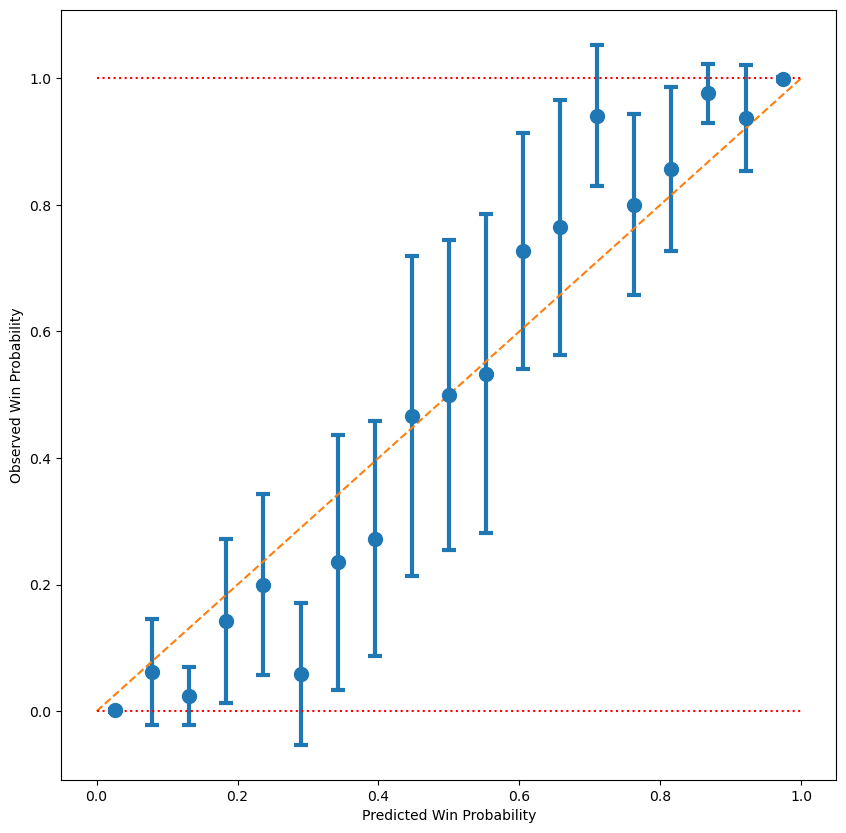

<Figure size 1000x1000 with 0 Axes>

In [129]:
# calculate error bars
bootstrap_election_agg = bootstrap_election_100_agg.apply(bootstrap_error_bars, axis=1)


plt.figure(figsize=(10, 10))
plt.errorbar(midpoints, 
             election_agg['mean'].values, 
             yerr=election_agg['err'].values, 
             fmt='.', elinewidth=3, ms=20, 
             capsize=5, capthick=3)
plt.plot([0, 1], [0, 1], '--')
plt.plot([0, 1], [1, 1], ':r')
plt.plot([0, 1], [0, 0], ':r')
plt.xlabel("Predicted Win Probability")
plt.ylabel("Observed Win Probability")
# Overlay empirical error bars on the same plot. Use the following 
# visual attributes: 
# ..., fmt='.r', elinewidth=1, ms=10, ecolor='red', capsize=5, ...
# Also, yerr can accept asymmetric errorbars (see the documentation for usage)

plt.figure(figsize=(10, 10))
plt.errorbar(midpoints, 
             bootstrap_election_agg['mean'].values, 
             yerr=np.stack([bootstrap_election_agg['err_low'].values, bootstrap_election_agg['err_high'].values]),
             fmt='.', elinewidth=3, ms=20, 
             capsize=5, capthick=3)
plt.plot([0, 1], [0, 1], '--')
plt.plot([0, 1], [1, 1], ':r')
plt.plot([0, 1], [0, 0], ':r')
plt.xlabel("Predicted Win Probability")
plt.ylabel("Observed Win Probability")
plt.show()

<!-- BEGIN QUESTION -->

### (PSTAT 234) Question 5g: Interpreting the Results

Are the 95% confidence intervals generally larger or smaller for more confident predictions (e.g. the predictions closer to 0 or 1).  What are the factors that determine the length of the error bars?

Compare and contrast model-based error bars and empirically obtained error bars. What are the advantages and disadvantages of these two approaches?

<!--
BEGIN QUESTION
name: q5g
manual: true
points: 5
-->

<!-- END QUESTION -->



_Intentionally Blank_

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [107]:
grader.check_all()

q1a passed!

q1b passed!

q1c passed!

q2a passed!

q2b passed!

q4a passed!

q4b passed!

q5a passed!

q5c passed!

q5e results:

Trying:
    len(bootstrap_data_means(election_sub))
Expecting:
    19
**********************************************************************
Line 2, in q5e 0
Failed example:
    len(bootstrap_data_means(election_sub))
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest q5e 0[0]>", line 1, in <module>
        len(bootstrap_data_means(election_sub))
      File "/tmp/ipykernel_19916/3650738408.py", line 10, in bootstrap_data_means
        bootstrap_means = data_in[indices].mean()
      File "/usr/lib/python3.10/site-packages/pandas/core/frame.py", line 3813, in __getitem__
        indexer = self.columns._get_indexer_strict(key, "columns")[1]
      File "/usr/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 6070, in _get_indexer_strict
        self._raise_if_missing(keyarr, indexer, axis_name)
      File "/usr/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 6130, in _raise_if_missing
        raise KeyError(f"None of [{key}] are in the [{axis_name}]")
    KeyError: "None of [Int64Index([ 306,  261,  500, 1658,  551, 1564, 1710, 1128,  989, 1052,\n            ...\n            1574, 1298,  547, 1393,  118, 1312, 1540,  699,  617,  474],\n           dtype='int64', length=1920)] are in the [columns]"

Trying:
    all(election_agg.index == bootstrap_data_means(election_sub).index)
Expecting:
    True
**********************************************************************
Line 2, in q5e 1
Failed example:
    all(election_agg.index == bootstrap_data_means(election_sub).index)
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest q5e 1[0]>", line 1, in <module>
        all(election_agg.index == bootstrap_data_means(election_sub).index)
      File "/tmp/ipykernel_19916/3650738408.py", line 10, in bootstrap_data_means
        bootstrap_means = data_in[indices].mean()
      File "/usr/lib/python3.10/site-packages/pandas/core/frame.py", line 3813, in __getitem__
        indexer = self.columns._get_indexer_strict(key, "columns")[1]
      File "/usr/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 6070, in _get_indexer_strict
        self._raise_if_missing(keyarr, indexer, axis_name)
      File "/usr/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 6130, in _raise_if_missing
        raise KeyError(f"None of [{key}] are in the [{axis_name}]")
    KeyError: "None of [Int64Index([  96,  958,  620,  768, 1010,  184, 1675,  346, 1075, 1829,\n            ...\n             495, 1282,  147,  736, 1630,   84, 1176,   70,  651,  847],\n           dtype='int64', length=1920)] are in the [columns]"

Trying:
    'mean' in bootstrap_data_means(election_sub).columns
Expecting:
    False
**********************************************************************
Line 2, in q5e 2
Failed example:
    'mean' in bootstrap_data_means(election_sub).columns
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.10/doctest.py", line 1350, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest q5e 2[0]>", line 1, in <module>
        'mean' in bootstrap_data_means(election_sub).columns
      File "/tmp/ipykernel_19916/3650738408.py", line 10, in bootstrap_data_means
        bootstrap_means = data_in[indices].mean()
      File "/usr/lib/python3.10/site-packages/pandas/core/frame.py", line 3813, in __getitem__
        indexer = self.columns._get_indexer_strict(key, "columns")[1]
      File "/usr/lib/python3.10/site-packages/pandas/core/indexes/base.py", line 6070, in _get_indexer_strict
        self._raise_if_missing(keyarr, indexer, axis_n

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [108]:
# Save your notebook first, then run this cell to export your submission.
grader.export()

/usr/lib/python3.10/site-packages/nbconvert/utils/pandoc.py:51: RuntimeWarning: You are using an unsupported version of pandoc (3.0.1).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
